# Plotting Research results

## `plot_results_by_config` example for synthetic dataset

In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../../..')

from batchflow.utils import plot_results_by_config

%matplotlib inline

`plot_results_by_config` allows to draw plots of specified variables for all configs in given `results` of `Research.run()`.
Generally `results` can be any `pandas.DataFrame` that follows certain structure. Such dataframe is constructed below.

In [2]:
# constructing test dataframe
d1 = pd.DataFrame(data={'iteration': np.arange(10), 'val2': np.sin(np.arange(10))})
d1['name'] = 'train'

d2 = pd.DataFrame(data={'iteration': np.arange(10), 'val1': np.arange(10)})
d2['name'] = 'test'

d3 = pd.concat([d1, d2], sort=False)

dfs = []
for rep in range(3):
    dft = d3.copy()
    dft['val1'] += 0.1 * rep
    dft['val2'] += 0.1 * rep
    dft['repetition'] = rep
    dfs.append(dft)
    
d4 = pd.concat(dfs, sort=False)

dfs = []
for i, config in enumerate(('conf1', 'conf2')):
    dft = d4.copy()
    dft['val1'] += (0.1 + i * 0.5) * np.random.randn(len(dft))
    dft['val2'] += (0.1 + i * 0.5) * np.random.randn(len(dft))
    dft['config'] = config
    dfs.append(dft)
    
res = pd.concat(dfs, sort=False)
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 9
Data columns (total 6 columns):
iteration     120 non-null int64
val2          60 non-null float64
name          120 non-null object
val1          60 non-null float64
repetition    120 non-null int64
config        120 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 6.6+ KB


Plotting results for several configs and several variables. If figure size is not specified, it is set to `(x, y)`,
where `x = (5 * number of variables)`, `y = (5 * number of configs in results)`

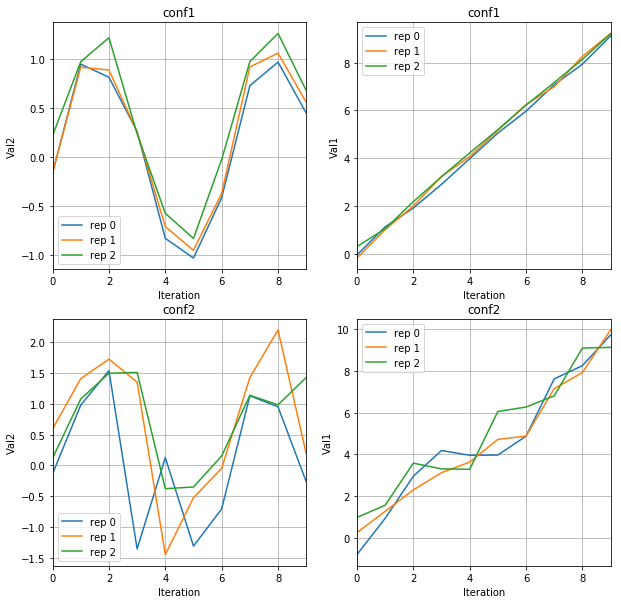

In [3]:
plot_results_by_config(res, (('train', 'val2'), ('test', 'val1')))

By default if only one variable is specified the plots for different configs are arranged horisontally

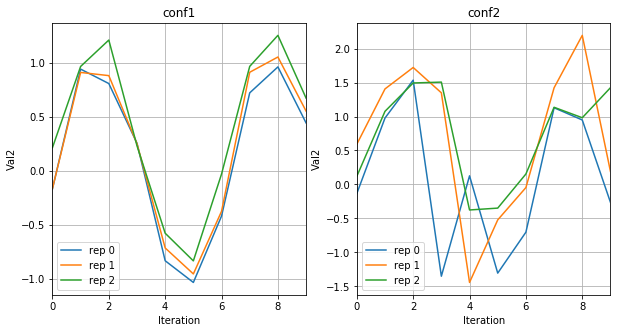

In [4]:
plot_results_by_config(res, ('train', 'val2'))

This can be changed by setting `force_flat=True`

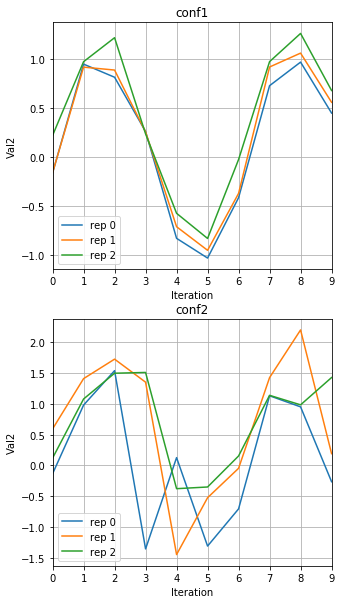

In [5]:
plot_results_by_config(res, ('train', 'val2'), force_flat=False)

Variables to plot and their sources can be passed via `dict`, custom figure size can be specified

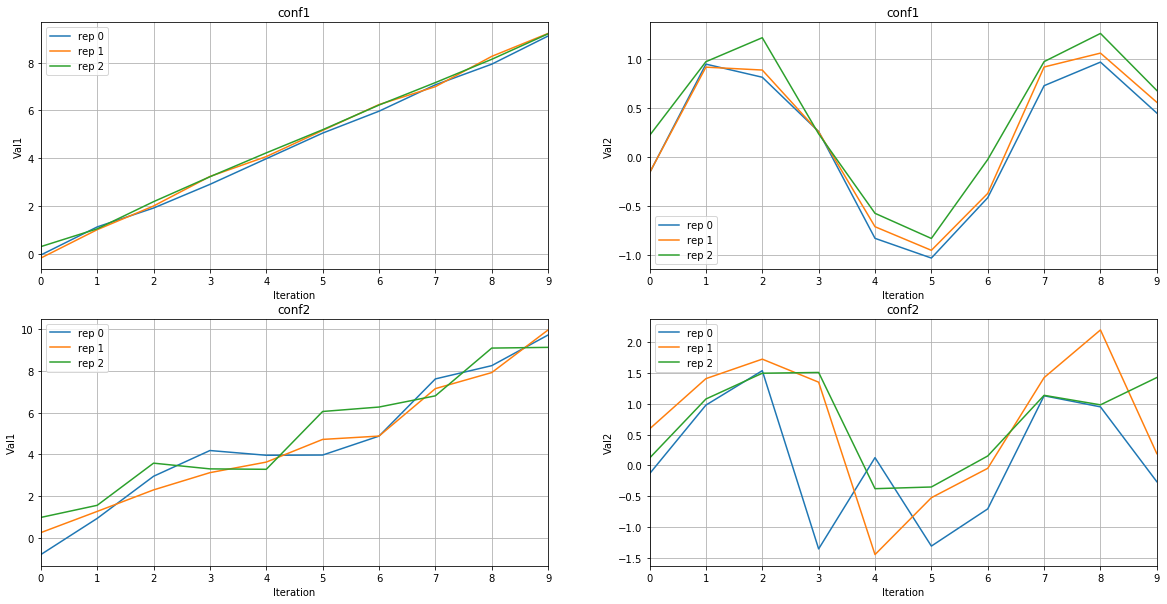

In [6]:
plot_results_by_config(res, {'train': 'val2', 'test': 'val1'}, figsize=(20, 10))

Following 2 code cells test plots layouts in marginal situations

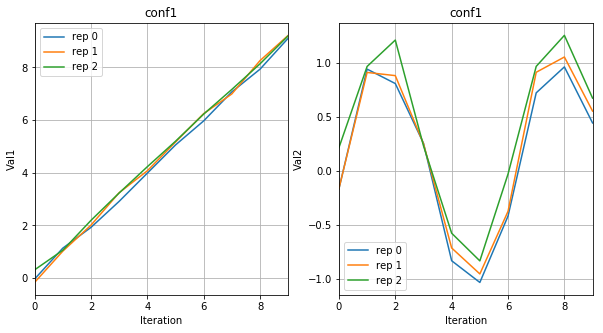

In [7]:
plot_results_by_config(res[res.config == 'conf1'], {'train': 'val2', 'test': 'val1'})

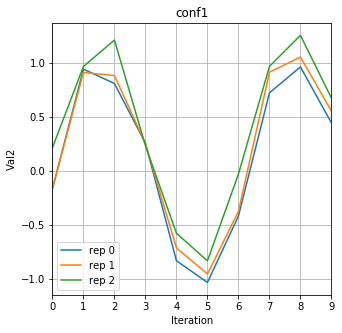

In [8]:
plot_results_by_config(res[res.config == 'conf1'], ('train', 'val2'))